In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import talib
import pynance 
#from pynance import equity
import yfinance as yf



In [29]:
!pip install Equity

  Using cached EQUITY-0.0.1.tar.gz (923 bytes)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [5 lines of output]
  running egg_info
  writing EQUITY.egg-info\PKG-INFO
  writing dependency_links to EQUITY.egg-info\dependency_links.txt
  writing top-level names to EQUITY.egg-info\top_level.txt
  error: package directory 'REGION' does not exist
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
error: subprocess-exited-with-error

Getting requirements to build wheel did not run successfully.
exit code: 1

See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [6]:
sns.set(style='darkgrid')


PyNance fetch failed: name 'equity' is not defined
Saving output with indicators...

Plotting indicators...


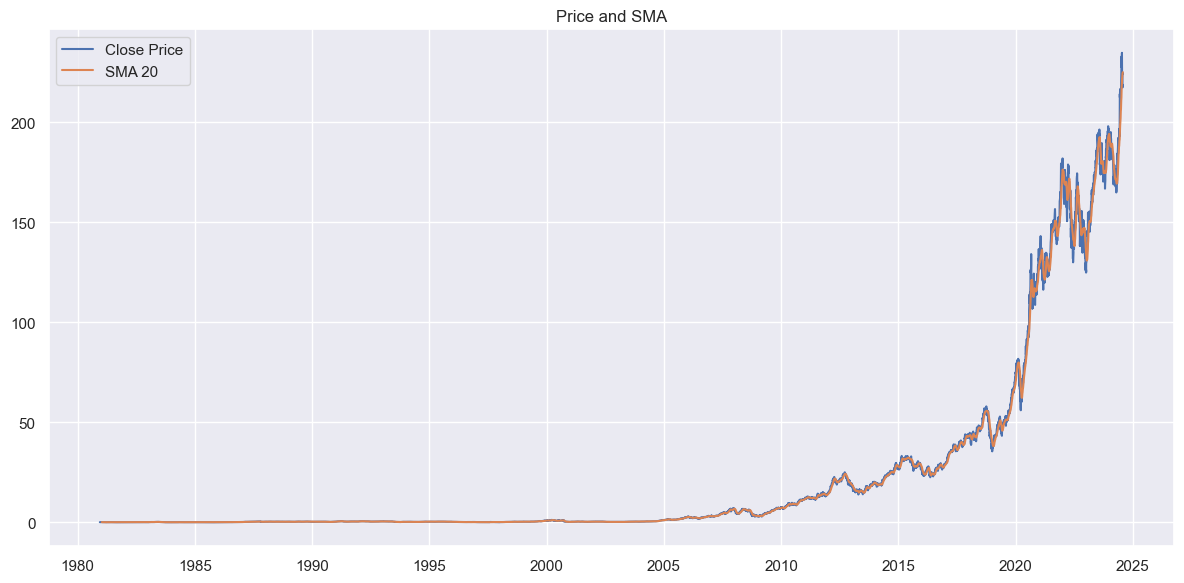

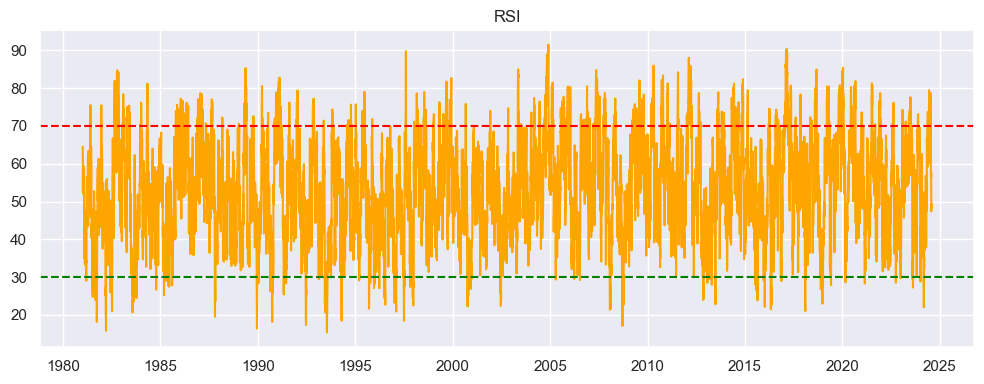

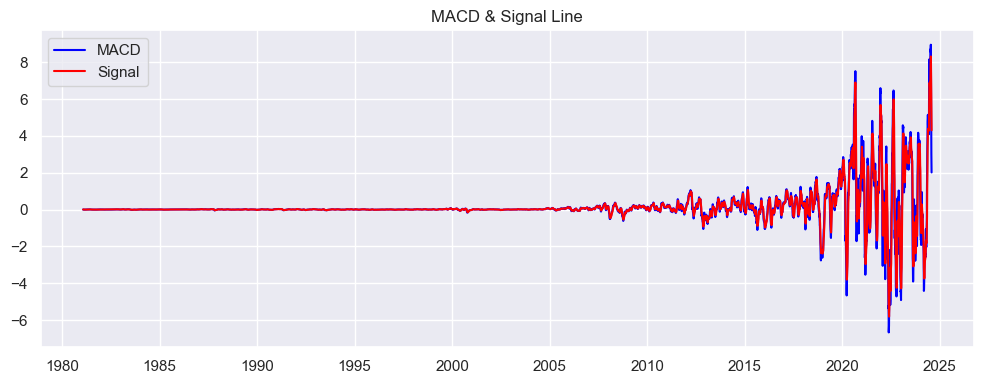

In [31]:
class TechnicalAnalyzer:
    def __init__(self, price_csv):
        self.df = pd.read_csv(price_csv, index_col='Date', parse_dates=True)
    
    def add_indicators(self):
        self.df['SMA_20'] = talib.SMA(self.df['Close'], timeperiod=20)
        self.df['RSI'] = talib.RSI(self.df['Close'], timeperiod=14)
        self.df['MACD'], self.df['MACD_signal'], _ = talib.MACD(self.df['Close'])
    
    def add_returns(self):
        self.df['daily_return'] = self.df['Close'].pct_change()
    
    def fetch_pynance_data(self, symbol='TSLA'):
        try:
            ticker = equity(symbol)
            print(f"\nPyNance - Recent TSLA Close: {ticker.price()}")
        except Exception as e:
            print(f"PyNance fetch failed: {e}")
    
    def plot_price_and_indicators(self):
        plt.figure(figsize=(12, 6))
        plt.plot(self.df['Close'], label='Close Price')
        plt.plot(self.df['SMA_20'], label='SMA 20')
        plt.title('Price and SMA')
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    def plot_rsi(self):
        plt.figure(figsize=(10, 4))
        plt.plot(self.df['RSI'], color='orange')
        plt.axhline(70, color='red', linestyle='--')
        plt.axhline(30, color='green', linestyle='--')
        plt.title('RSI')
        plt.tight_layout()
        plt.show()
    
    def plot_macd(self):
        plt.figure(figsize=(10, 4))
        plt.plot(self.df['MACD'], label='MACD', color='blue')
        plt.plot(self.df['MACD_signal'], label='Signal', color='red')
        plt.title('MACD & Signal Line')
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    def save(self, output_path='../data/price_with_indicators.csv'):
        self.df.to_csv(output_path)


if __name__ == "__main__":
    analyzer = TechnicalAnalyzer('../data/yfinance_data/AAPL_historical_data.csv')
    analyzer.add_indicators()
    analyzer.add_returns()
    analyzer.fetch_pynance_data()
    
    print("Saving output with indicators...")
    analyzer.save()

    print("\nPlotting indicators...")
    analyzer.plot_price_and_indicators()
    analyzer.plot_rsi()
    analyzer.plot_macd()